# Model Development

## Model Layout

First I am laying out the design of the model

### Generator

- Input layer: 100 dim vector 
- Dense Layer: 128 (ReLU)
- Dense Layer: 128*32 (ReLU)
- reshape 16 x 16 x 32
- Conv2DTranspose: filters 32, kernel size 5x5, activation ReLU, stride=9, padding same
- Conv2DTranspose: filters 8, kernel size 3x3, activation ReLU, stride=5, 

Currently, created the generator model, but the output dimension is not correct, I will need to make if fit the input_image dimension of the discriminator or crop it after to fit into the discriminator.

The model architecture was motivated by starting at a low 100 Dimensional latent space that will store features. Then they will be expanded on by the 2 Dense layers that follow which is transformed/reshaped to have a transpose convolution applied to it in order to expand it as an image. The convolutions are meant to expand on the stored featurs of the latent space and tranlate them to the actual image representation (generate)

This is the idea, but further testing needs to be done

- I was able to get dummy data to go throught the generator and it shows there is a problem with the models ability to generate, most likely due to the size of the kernels picked. There are alarming regions of static values. 

I testing out various values for the stride of the generators convolutinal layers, and 5 for the first stride and 3 for the second stride seemed to output the best randomized output with no uniform regions. This will be ideal for baking the features into a model to avoid weird artifacts. 

### Discriminator

- 196 x 160 inputted into first conv Layer with 16 filters & 9x9 kernel, same padding, and stride of 5
- Next conv layer 32 filters 5x5 with same padding & stride of 4
- Next conv layer 128 filters 3x3 with same padding & stride of 3
- Flatten
- Dense to 1 with sigmoid

This architecture was chosen to hopefully extract different percision of featurs at each convolutional layer so that various degrees of patterns can be recognized by the discriminator

### Combined


### Issues
I am going to move on to grabbing the data for now cause I do not fully understand how the conv2D works right now.

In [7]:
!pip list

Package                   Version
------------------------- -----------
absl-py                   2.1.0
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
beautifulsoup4            4.12.3
bleach                    4.1.0
boto3                     1.35.45
botocore                  1.35.45
Brotli                    1.0.9
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
executing                 0.8.3
fastjsonschema            2.16.2
ffmpeg                    1.4
flatbuffers               24.3.25
fonttools       

Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_160 (Conv2D)             │ (None, 40, 32, 16)     │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_161 (Conv2D)             │ (None, 10, 8, 32)      │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_162 (Conv2D)             │ (None, 4, 3, 128)      │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_53 (Flatten)            │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 1)              │         1,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,673 (205.75 KB)

 Trainable params: 52,673 (205.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_158 (Dense)               │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 8192)           │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_52 (Reshape)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_104            │ (None, 80, 80, 32)     │        25,632 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_105            │ (None, 240, 240, 8)    │         2,312 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Conv2D)                 │ (None, 240, 240, 1)    │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097,713 (4.19 MB)

 Trainable params: 1,097,713 (4.19 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\zaaim\anaconda3\envs\myenv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_1991']. Received: the structure of inputs=*
  warnings.warn(


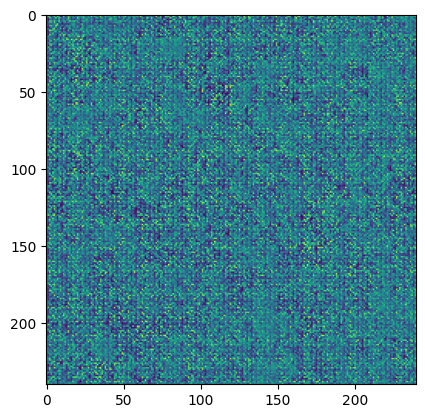

In [56]:
import numpy as np
import os
import boto3
import tensorflow
from matplotlib import pyplot as plt

# Sepcifying backend for Keras
os.environ["KERAS_BACKEND"]="tensorflow"

import keras
from keras import layers
from keras import ops


'''
Initializes the discriminator model 
'''
def init_discriminator(batch_size=155*4, image_shape=(196, 160, 1)):
    model = keras.Sequential() # Sequential model
    model.add(keras.Input(shape=image_shape))
    model.add(layers.Conv2D(filters=16, kernel_size=9, strides=5, padding="same", activation="relu")) # First Convolution
    model.add(layers.Conv2D(filters=32, kernel_size=5, strides=4, padding="same", activation="relu")) # Second Convolution
    model.add(layers.Conv2D(filters=128, kernel_size=3, strides=3, padding="same", activation="relu")) # Third Convolution
    model.add(layers.Flatten()) # Flatten output of last confolution
    model.add(layers.Dense(1, activation="sigmoid")) # Connect to single neuron to determine probability
    
    return model

def init_generator(batch_size=155*4, latentD=100):
    model = keras.Sequential() # Sequential model
    model.add(keras.Input(shape=(latentD,)))
    model.add(layers.Dense(128, activation='relu')) # First layer of "feature generation" (Expanding latent space)
    model.add(layers.Dense(256*32, activation='relu')) # Expand latent space to first transpose convolution space wih feature generation
    model.add(layers.Reshape(target_shape=(16, 16, 32))) # Reshape to match transpose convolution dimension
    model.add(layers.Conv2DTranspose(filters=32, kernel_size=5, strides=5, padding="same", activation='relu')) # Expand
    model.add(layers.Conv2DTranspose(filters=8, kernel_size=3, strides=3, padding="same", activation="relu")) # Expand
    model.add(layers.Conv2D(filters=1, kernel_size=(3, 3), strides=1, padding="same", activation="sigmoid", name="output")) # Reduce convolution to image size
    return model

def combined_model():
    return


def train_on(crux=(1, 1, 1), step=1):
    return

def test_generator(test_vector):
    feature_extractor = keras.Model(
        inputs=generator.inputs,
        outputs=generator.get_layer(name="output").output,
    )

    feature = feature_extractor(test_vector)

    fig, ax = plt.subplots()
    ax.imshow(feature[0])
    plt.show()
    num=53
    fig.savefig(f"gen_test{num}.png", format="png")

# Load Dataset in batch loop
"""Batch size: ????????? set after design made (simple array-like objects)"""

discriminator = init_discriminator()
generator = init_generator()

# View the initialized models

discriminator.summary()
generator.summary()

x=300*np.random.randn(1, 100, 1)

test_generator(x)

# Grab the .png sizes
